<a href="https://colab.research.google.com/github/cinaral/saymyname/blob/master/Canonical_FormClosedLoopSystemTry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In c:\python36\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


enter coefficients of numerator of input function = 1 2 5 6
enter coefficients of denumerator of input function = 2 5 7 8 9
Input or reference function in s domain

     s^3 + 2 s^2 + 5 s + 6
-------------------------------
2 s^4 + 5 s^3 + 7 s^2 + 8 s + 9

enter coefficients of numerator of canonical plant function = 1 6 2 3
enter coefficients of denumerator of canonical plant function = 1 7 2 6 1
Canonical plant function in s domain

    s^3 + 6 s^2 + 2 s + 3
-----------------------------
s^4 + 7 s^3 + 2 s^2 + 6 s + 1

enter coefficients of numerator of canonical feedback function = 3 9 
enter coefficients of denumerator of canonical feedback function = 3 9 2
Canonical feedback function in s domain

    3 s + 9
---------------
3 s^2 + 9 s + 2

Open loop transfer function

        3 s^4 + 27 s^3 + 60 s^2 + 27 s + 27
----------------------------------------------------
3 s^6 + 30 s^5 + 71 s^4 + 50 s^3 + 61 s^2 + 21 s + 2

Closed loop transfer function

        3 s^9 + 48 s^8 + 257 s^7 +

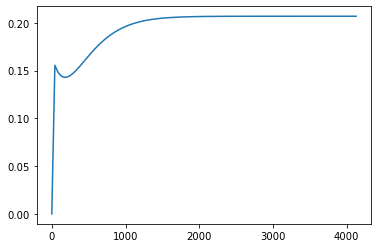

Impulse responce


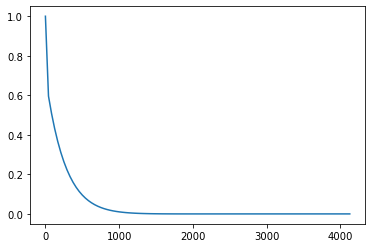

Bode plot


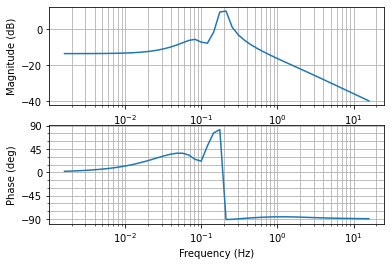

(array([[-6.83267364e+00+0.j        , -6.81067711e+00+0.j        ,
         -2.77963663e+00+0.j        , ..., -3.74682045e-03+1.20485143j,
          1.69599672e-03-0.92589945j,  1.69599672e-03+0.92589945j],
        [-6.83267360e+00+0.j        , -6.83267229e+00+0.j        ,
         -2.78032955e+00+0.j        , ..., -5.33606272e-02+1.20598647j,
          1.69599672e-03-0.92589945j,  1.69599672e-03+0.92589945j],
        [-6.83267504e+00+0.j        , -6.83267362e+00+0.j        ,
         -2.78032963e+00+0.j        , ..., -5.33667557e-02+1.20598635j,
          1.69599672e-03-0.92589945j,  1.69599672e-03+0.92589945j],
        ...,
        [-2.31456143e+02+0.j        , -6.83267364e+00+0.j        ,
         -5.71422434e+00+0.j        , ..., -2.46454783e-01+0.j        ,
          1.69599672e-03-0.92589945j,  1.69599672e-03+0.92589945j],
        [-2.30534050e+03+0.j        , -6.83267364e+00+0.j        ,
         -5.73990743e+00+0.j        , ..., -2.42169942e-01+0.j        ,
          1.69599672

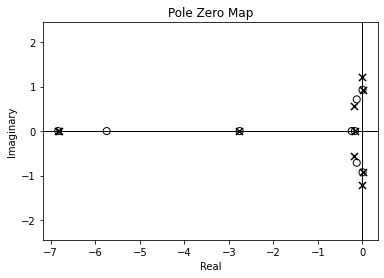

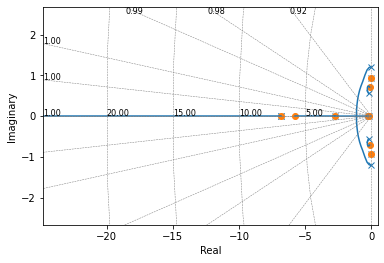

In [1]:
!pip install control
#!pip install pydy
#!pip install slycot
#!pip install bqplot
#!pip install ipyvolume
#!pip install phoebe

import matplotlib
import ipywidgets
import plotly
import numpy as np
import math 
#import control
#import pydy
#import phoebe
import os
from IPython import *
#import bqplot as bqp
#import ipyvolume as ipv
import scipy

%matplotlib inline
from sympy import symbols
from sympy import simplify
from sympy.abc import s, t, a
from sympy.integrals import *
from sympy.plotting import *
from control import *
from control.matlab import *
import matplotlib.pyplot as plt



#Matlab form by using python.control
#You can write any s domain functions in the form; a b c ... 
#where a corresponds to coefficient of nth order term, 
#b is the coefficient of (n-1)th order term and so on.

numX = list(map(float,input('enter coefficients of numerator of input function = ').split()))
denX = list(map(float,input('enter coefficients of denumerator of input function = ').split()))
X = tf(numX, denX)
print('Input or reference function in s domain')
print(X)

numG = list(map(float,input('enter coefficients of numerator of canonical plant function = ').split()))
denG = list(map(float,input('enter coefficients of denumerator of canonical plant function = ').split()))
G = tf(numG, denG)
print('Canonical plant function in s domain')
print(G)

numH = list(map(float,input('enter coefficients of numerator of canonical feedback function = ').split()))
denH = list(map(float,input('enter coefficients of denumerator of canonical feedback function = ').split()))
H = tf(numH, denH)
print('Canonical feedback function in s domain')
print(H)

GH = G*H
print('Open loop transfer function')
print(GH)

M = G/(1+G*H)
print('Closed loop transfer function')
print(M)

Y = M*X
print('Output in s domain')
print(Y)

# Step response for the system
print('Step response')
plt.figure(1)
yout, T = step(M)
plt.plot(T.T, yout.T)
plt.show(block=False)

#impulse responce
print('Impulse responce')
plt.figure(2)
yout, T = impulse(M)
plt.plot(T.T, yout.T)
plt.show(block=False)

# Bode plot for the system
print('Bode plot')
plt.figure(3)
mag, phase, om = bode(M, logspace(-2, 2), Plot=True)
plt.show(block=False)

#Positions of poles and zeros
pzmap(M,Plot=True,grid=False, title='Pole Zero Map')

# Root lcous plot for the system
rlocus(M)
